# RJ's Branch

The following code solves the equations of motion with air drag. With drag force $-\alpha |\dot{r}|\dot{r}$ and gravitational force $-mg\hat{y}$, these equations of motion are:

$\ddot{x}=-\beta \dot{x}\sqrt{{\dot{x}^2}+{\dot{y}^2}}$

$\ddot{y}=-g-\beta \dot{y}\sqrt{{\dot{x}^2}+{\dot{y}^2}}$

where $\beta = \frac{\alpha}{m}$, $\alpha =\frac{\rho C_{d}A}{2}$, $\rho$ is the air desnisty, $C_{d}$ is the drag coefficient, and $A$ is the cross-sectional area of the projectile.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pylab

In [2]:
def solve(f,y0,interval,steps):
    """ Solve ODE by Euler method, with fixed number
    of steps.

    In contrast to the examples of Newman Chapter 8, which build up a
    list, point by point, 
    
    f: function giving ODE as y'=f(x,y)
    y0: initial value
    interval: tuple region (a,b) on which to solve ODE
    steps: number of steps
    
    Returns (x,y) points, as (steps+1)x2 numpy array.
    """
    
    #Calculates the size of a single step
    a = interval[0]
    b = interval[1]
    h = (b - a) / steps
    x = y0
    
    #Creates the arrays that will store the data
    tpoints = np.arange(a, b, h)
    xpoints = []
    
    #Loops for every point in tpoints
    for t in tpoints:
        #Euler's method
        xpoints.append(x)
        x += h * f(x, t)
        
    #Returns both arrays
    return (tpoints, xpoints)

In [17]:
def projectile(dt, v_init, theta, x, y, drag=False, A_m=0, elevation=False, p0=101325, y0=1e4):
    """
    Parameters:
        dt        - time step in s
        v_init    - initial velocity in m/s
        theta     - launch angle in radians
        x         - array of x values
        y         - array of y values
        drag      - boolean determining if drag force is to be calculated (optional)
        A_m       - coefficient used to calculate the drag force (optional)
        elevation - boolean determining if elevation is to be considered (optional)
        p0        - initial air density at sea level in Pa (optional)
        y0        - initial altitude in m (optional)
        
    Calculates the projectile motion of an object with the given parameters with or 
    without air drag.
    
    Returned:
        The x and y arrays containing the new values.
    """
    
    #Initializes the velocity at a specific launch angle
    vx = v_init * math.cos(theta)
    vy = v_init * math.sin(theta)
    nmax = len(x)
    
    #Loops for every element in x
    for i in range(1, nmax):
        #Uses Euler method to get the solution
        x[i] = x[i-1] + vx * dt
        y[i] = y[i-1] + vy * dt
            
        #Without air drag, only force of gravity in y direction    
        if drag == False:
            vy = vy - 9.8 * dt
            
        #With air drag, need drag force acting on both x and y
        else:
            fd = A_m * math.sqrt(vx ** 2 + vy ** 2)
            
            if elevation == False:
                vy = vy - 9.8 * dt - fd * vy * dt
                vx = vx - fd *vx * dt
                
            else:
                p = p0 * (np.e **(-y[i] / y0))
                f = (p / p0) * fd
                vy = vy - 9.8 * dt - f * vy * dt
                vx = vx - f *vx * dt
                
        if y[i] <= 0:
            x[i] = x[i-1]
            #break
        
    #Returns the values to be plotted
    return x, y

[    0.           123.74368671   247.48737342 ... 50116.1931166
 50116.1931166  50116.1931166 ]
[ 0.00000000e+00  1.23743687e+02  2.46874873e+02 ... -7.02718772e+06
 -7.03012464e+06 -7.03306217e+06]


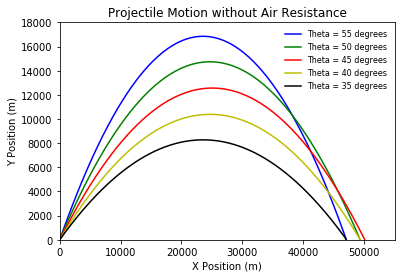

In [19]:
dt = 0.25
v_init = 700
theta1 = (55 / 180) * math.pi
theta2 = (50 / 180) * math.pi
theta3 = (45 / 180) * math.pi
theta4 = (40 / 180) * math.pi
theta5 = (35 / 180) * math.pi

x1 = np.zeros(5000)
y1 = np.zeros(5000)
x2 = np.zeros(5000)
y2 = np.zeros(5000)
x3 = np.zeros(5000)
y3 = np.zeros(5000)
x4 = np.zeros(5000)
y4 = np.zeros(5000)
x5 = np.zeros(5000)
y5 = np.zeros(5000)

x1, y1 = projectile(dt, v_init, theta1, x1, y1)
x2, y2 = projectile(dt, v_init, theta2, x2, y2)
x3, y3 = projectile(dt, v_init, theta3, x3, y3)
x4, y4 = projectile(dt, v_init, theta4, x4, y4)
x5, y5 = projectile(dt, v_init, theta5, x5, y5)
        
#Creates the plot
ax = plt.subplot(111)

#Plots the data and sets the axes
ax.plot(x1, y1, "b", label="Theta = 55 degrees")
ax.plot(x2, y2, "g", label="Theta = 50 degrees")
ax.plot(x3, y3, "r", label="Theta = 45 degrees")
ax.plot(x4, y4, "y", label="Theta = 40 degrees")
ax.plot(x5, y5, "k", label="Theta = 35 degrees")
ax.set_title("Projectile Motion without Air Resistance")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_ylim(0, 18000)
ax.set_xlim(0, 55000)
ax.legend(frameon=False, loc='upper right', prop={'size': 8})

#Shows the plot
plt.show()

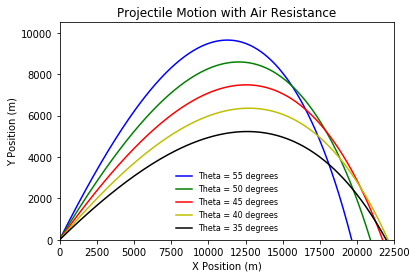

In [5]:
dt = 0.25
v_init = 700
theta1 = (55 / 180) * math.pi
theta2 = (50 / 180) * math.pi
theta3 = (45 / 180) * math.pi
theta4 = (40 / 180) * math.pi
theta5 = (35 / 180) * math.pi
A_m = 4e-5

x1 = np.zeros(5000)
y1 = np.zeros(5000)
x2 = np.zeros(5000)
y2 = np.zeros(5000)
x3 = np.zeros(5000)
y3 = np.zeros(5000)
x4 = np.zeros(5000)
y4 = np.zeros(5000)
x5 = np.zeros(5000)
y5 = np.zeros(5000)

x1, y1 = projectile(dt, v_init, theta1, x1, y1, True, A_m)
x2, y2 = projectile(dt, v_init, theta2, x2, y2, True, A_m)
x3, y3 = projectile(dt, v_init, theta3, x3, y3, True, A_m)
x4, y4 = projectile(dt, v_init, theta4, x4, y4, True, A_m)
x5, y5 = projectile(dt, v_init, theta5, x5, y5, True, A_m)

#Creates the plot
ax = plt.subplot(111)

#Plots the data and sets the axes
ax.plot(x1, y1, "b", label="Theta = 55 degrees")
ax.plot(x2, y2, "g", label="Theta = 50 degrees")
ax.plot(x3, y3, "r", label="Theta = 45 degrees")
ax.plot(x4, y4, "y", label="Theta = 40 degrees")
ax.plot(x5, y5, "k", label="Theta = 35 degrees")
ax.set_title("Projectile Motion with Air Resistance")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_ylim(0, 10500)
ax.set_xlim(0, 22500)
ax.legend(frameon=False, loc='lower center', prop={'size': 8})

#Shows the plot
plt.show()

The above plot shows the projectile motion of a ball with air resistance after being thrown at different launch angles. This plot shows the launch angles of 35, 40, 45, 50, and 55 degrees. As we can see, the larger the angle, the further the ball will travel in the y-direction and the smaller the angle, the further the ball will travel in the x-direction.

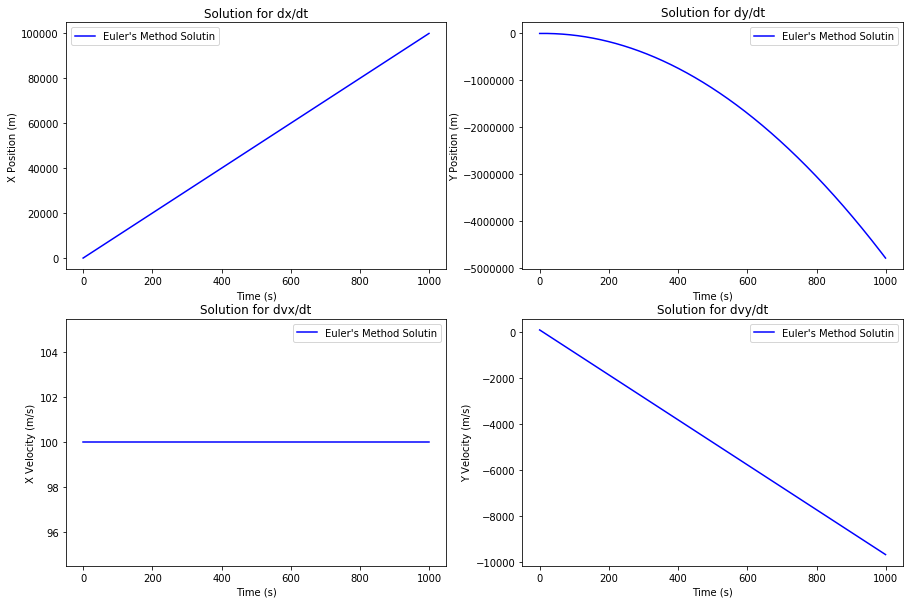

In [37]:
x0 = 0
y0 = 0
vx0 = 100
vy0 = 100
g = 9.8 

def x(x, t):
    return vx0 

def vx(v, t):
    return 0

def vy(v, t):
    return -g

x1, y1 = solve(x, x0, (0,1000), 1000)
x2, y2 = solve(vx, vx0, (0,1000), 1000)
x4, y4 = solve(vy, vy0, (0,1000), 1000)

def y(y, t):
    return y4[int(t)]

x3, y3 = solve(y, y0, (0,1000), 1000)

#yxa = []
#yvxa = []
#yya = []
#yvya = []

#for i in t:
#    yxa.append()

#Creates the plot
fig,ax = plt.subplots(2,2,figsize=(15,10))

#Plots the data and sets the axes
ax[0,0].plot(x1, y1, "b", label="Euler's Method Solutin")
#ax[0].plot(t, yxa, "g", label="Exact Result")
ax[0,0].set_title("Solution for dx/dt")
ax[0,0].set_xlabel("Time (s)")
ax[0,0].set_ylabel("X Position (m)")
ax[0,0].legend()
ax[1,0].plot(x2, y2, "b", label="Euler's Method Solutin")
#ax[1].plot(t, yvxa, "g", label="Exact Result")
ax[1,0].set_title("Solution for dvx/dt")
ax[1,0].set_xlabel("Time (s)")
ax[1,0].set_ylabel("X Velocity (m/s)")
ax[1,0].legend()
ax[0,1].plot(x3, y3, "b", label="Euler's Method Solutin")
#ax[2].plot(t, yya, "g", label="Exact Result")
ax[0,1].set_title("Solution for dy/dt")
ax[0,1].set_xlabel("Time (s)")
ax[0,1].set_ylabel("Y Position (m)")
ax[0,1].legend()
ax[1,1].plot(x4, y4, "b", label="Euler's Method Solutin")
#ax[3].plot(t, yvya, "g", label="Exact Result")
ax[1,1].set_title("Solution for dvy/dt")
ax[1,1].set_xlabel("Time (s)")
ax[1,1].set_ylabel("Y Velocity (m/s)")
ax[1,1].legend()

#Shows the plot
plt.show()

#ax.set_ylim(0, 10500)
#ax.set_xlim(0, 22500)

The above plots shows the solution to the four differential equations for projectile motion. The exact solutions have not yet been added to the plots, but we plan to add it soon. 

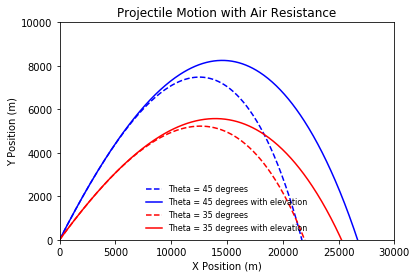

In [7]:
dt = 0.25
v_init = 700
theta1 = (45 / 180) * math.pi
theta2 = (35 / 180) * math.pi
A_m = 4e-5

x1 = np.zeros(5000)
y1 = np.zeros(5000)
x2 = np.zeros(5000)
y2 = np.zeros(5000)
x3 = np.zeros(5000)
y3 = np.zeros(5000)
x4 = np.zeros(5000)
y4 = np.zeros(5000)

x1, y1 = projectile(dt, v_init, theta1, x1, y1, True, A_m)
x2, y2 = projectile(dt, v_init, theta1, x2, y2, True, A_m, True)
x3, y3 = projectile(dt, v_init, theta2, x3, y3, True, A_m)
x4, y4 = projectile(dt, v_init, theta2, x4, y4, True, A_m, True)

#Creates the plot
ax = plt.subplot(111)

#Plots the data and sets the axes
ax.plot(x1, y1, "b--", label="Theta = 45 degrees")
ax.plot(x2, y2, "b", label="Theta = 45 degrees with elevation")
ax.plot(x3, y3, "r--", label="Theta = 35 degrees")
ax.plot(x4, y4, "r", label="Theta = 35 degrees with elevation")
ax.set_title("Projectile Motion with Air Resistance")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_ylim(0, 10000)
ax.set_xlim(0, 30000)
ax.legend(frameon=False, loc='lower center', prop={'size': 8})

#Shows the plot
plt.show()

The above plot shows the projectile motion of an object with and without the effect of lower air density at higher altitudes. This plot shows an object with launch angles 35 and 45 degrees. As we can see, when the elevation is taken into account (i.e. the lower air densities), the object travels further in both directions.